# <center>Simple Linear Regression</center>


## About this Notebook
In this notebook, we learn how to use `scikit-learn` to implement simple linear regression using dataset that is related to Fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

**`FuelConsumptionCo2.csv`** contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


- Supervised Learning:
    - Classification
    - **Regression**
    
## Practice

### 1. Import libraries and load dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Sanity check

In [7]:
df=pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
#check bản ghi và số cột
df.shape #hoặc len(df), len(df.colummns)

(1067, 13)

In [6]:
#check NA
df.isna().sum() #hoặc df.isnull()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [15]:
#check kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [16]:
#mỗi cột ngốn bn bộ nhớ
df.memory_usage()

Index                        128
MODELYEAR                   8536
MAKE                        8536
MODEL                       8536
VEHICLECLASS                8536
ENGINESIZE                  8536
CYLINDERS                   8536
TRANSMISSION                8536
FUELTYPE                    8536
FUELCONSUMPTION_CITY        8536
FUELCONSUMPTION_HWY         8536
FUELCONSUMPTION_COMB        8536
FUELCONSUMPTION_COMB_MPG    8536
CO2EMISSIONS                8536
dtype: int64

In [8]:
df.memory_usage().sum()

111096

In [19]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [21]:
df[['MAKE','MODEL','VEHICLECLASS','FUELTYPE','TRANSMISSION']].describe()

,MAKE,MODEL,VEHICLECLASS,FUELTYPE,TRANSMISSION
count,1067,1067,1067,1067,1067
unique,39,663,16,4,22
top,FORD,F150 FFV 4X4,MID-SIZE,X,A6
freq,90,8,178,514,222


### 3. Eploratory Data Analysis

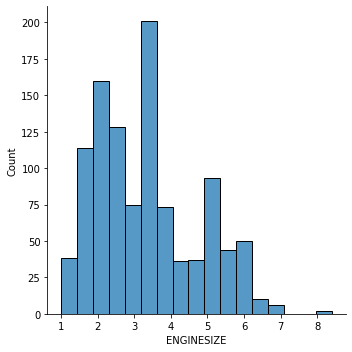

In [24]:
#Trực quan hóa dữ liệu xem phân bố nó như nào (chuẩn, đều,...)
sns.displot(data=df['ENGINESIZE'])

<AxesSubplot:>

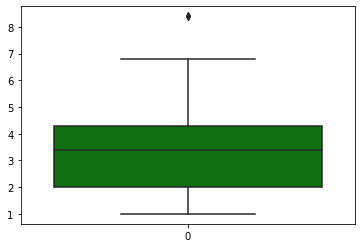

In [38]:
sns.boxplot(data=df['ENGINESIZE'],color='green')

<AxesSubplot:>

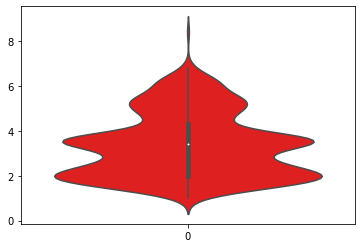

In [39]:
sns.violinplot(data=df['ENGINESIZE'],color='red')

<AxesSubplot:>

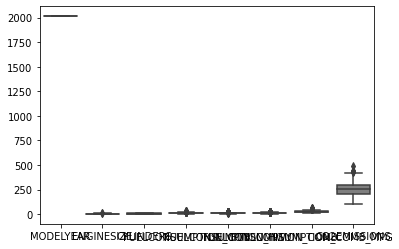

In [ ]:
sns.boxplot(data=df)

<AxesSubplot:>

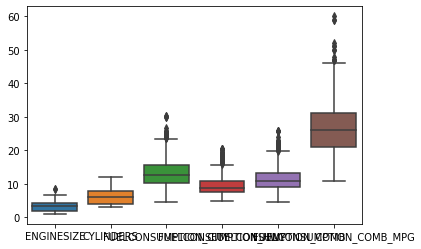

In [42]:
sns.boxplot(data=df.drop(columns=['MODELYEAR','CO2EMISSIONS']))

<function matplotlib.pyplot.show(close=None, block=None)>

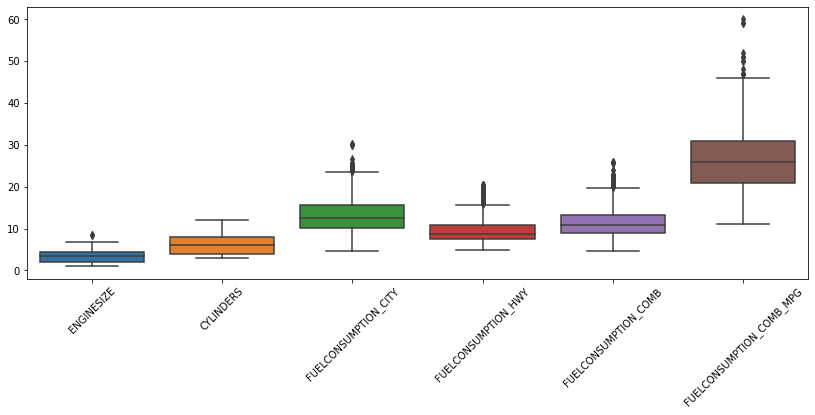

In [46]:
plt.figure(figsize=(14,5)) #mục đích là để đồ thị nhìn giãn ra,ko bị díu vào nhau
sns.boxplot(data=df.drop(columns=['MODELYEAR','CO2EMISSIONS']))
plt.xticks(rotation=45)#có thể là yticks, dùng để xoay chéo tên cột được hiển thị, rotation là số độ, xoay 45 độ
plt.show

In [22]:
def square (x):
    """
    Cú pháp
    Mục tiêu
        Tham số
    Gía trị đầu vào
    Gía trj đầu ra
    """
    return x**2

### 4. Feature selection

In [48]:
#Đánh giá sự tương quan, trước đó đã drop cột MODELYEAR
df.drop(columns='MODELYEAR').corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<AxesSubplot:>

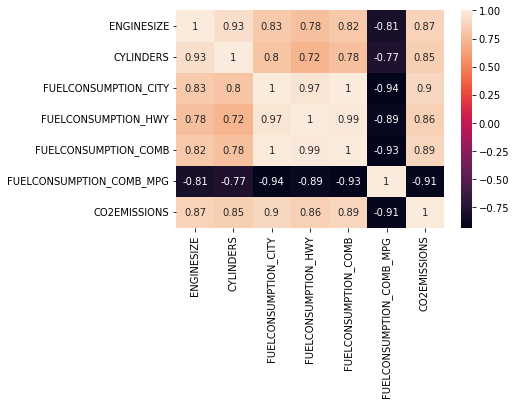

In [9]:
#trực quan hóa sự tương quan
sns.heatmap(df.drop(columns='MODELYEAR').corr(),annot=True)
#annot dùng để thêm số vào ô

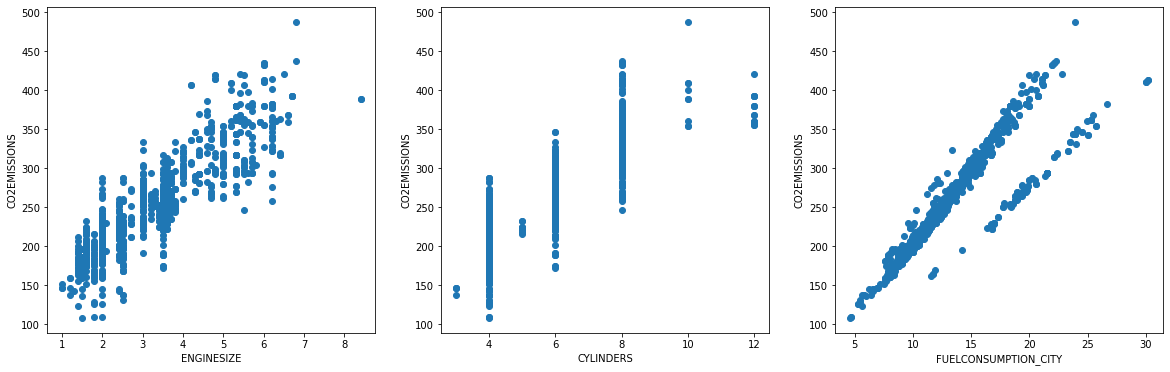

In [11]:
fig, ax = plt.subplots (1,3, figsize=(20,6))
ax[0].scatter(df.ENGINESIZE, df.CO2EMISSIONS)
ax[0].set(xlabel='ENGINESIZE', ylabel='CO2EMISSIONS')

ax[1].scatter(df.CYLINDERS, df.CO2EMISSIONS)
ax[1].set(xlabel='CYLINDERS', ylabel='CO2EMISSIONS')

ax[2].scatter(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS)
ax[2].set(xlabel='FUELCONSUMPTION_CITY', ylabel='CO2EMISSIONS')

plt.show()

### 5. Train model

In [13]:
#import Linear từ thư viện sklearn
from sklearn.linear_model import LinearRegression

In [59]:
#Tạo Mh tuyến tính từ 2 biến (bước fit dữ liệu vào trong MH)
model = LinearRegression ()
model.fit(df[['ENGINESIZE']], df['CO2EMISSIONS'])


LinearRegression()

In [22]:
model.coef_

array([39.12519979])

In [23]:
model.intercept_

125.30409949535726

In [25]:
prediction = model.predict(df[['ENGINESIZE']])
prediction

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [26]:
# y = ax + b
predictions1 = model.coef_[0]*df[['ENGINESIZE']] + model.intercept_
predictions1

,ENGINESIZE
0,203.554499
1,219.204579
2,183.991899
3,262.242299
4,262.242299
...,...
1062,242.679699
1063,250.504739
1064,242.679699
1065,250.504739


In [27]:
pd.DataFrame({'auto':prediction,
             'manual':predictions1.ENGINESIZE.to_list()})

,auto,manual
0,203.554499,203.554499
1,219.204579,219.204579
2,183.991899,183.991899
3,262.242299,262.242299
4,262.242299,262.242299
...,...,...
1062,242.679699,242.679699
1063,250.504739,250.504739
1064,242.679699,242.679699
1065,250.504739,250.504739


### 6. Evaluation

In [49]:
![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATIAAAClCAMAAADoDIG4AAABOFBMVEX///+Pqtyq0Y6p0Y70sYOxwOKAnNAoUZOTruCPnLl1kceTn7t5iq2r046Pqdz3s4Ov146Mn8CNmb2Yv4sxWoV3h7KLsorKl4IAAAClz4jX2+dLYp7vroNagIf29vZVcqrKysrp6ene3t6+vr6RkZEUPokARo3zqne1tbVfX1+FhYWNjY3oqYRAbo+bm5vt7e1wcHB9fX3Gxsaqqqo/Pz8wMDDX19dbW1v//vgkJCRRUVGioqLzp3H+8OL20sJHR0cYGBiw2Kr75NP77u/84MjP4LDE0OqqvOIoKCjn9e+v1Zzx897Y5b3N59Dj8d7n7tCdy3z1vZv40LT2upD1wKb+7Nprjc7AzOjJ3KS915Wt1abB4cHJ4bbo8Nqj0Zj7+OlYgMlDbIL2yrP6z6z0up754t342M783cJNJoVmAAAPbElEQVR4nO1dC0PiWpKuJtx7+85sOr07s7OcHjebB9150BMSAiGCoKB2C/LGnkFB2cUW//8/2DqJIgq22hcMaD4wlcfBnHxUVaqSUAcgRIgQIUKECBEiRIgZiBKd8g5OHD7gvqwuYsJkVjZSBpWSiRPL8VdKsVzaIxIE8bn7tppImRqoPKhi3ICklDJ4I85LmqGCJYFBCUT+kjEQEjLkTElIqEF3OHhokAHDhoyTtG3BEPKSKOvJmLjt6JLmCKavcrmkzG8ndZuX+VyoajF7W+W3ZVsyNYNSljRNS7TAlnUxrVsJn7I0b1sZKZ8CFE7QPQ4atiEKacgeQI6X45QyS5JMMQ0matl2EniPMjUNO6BJeZmKV09ZAkmx0FOBkLVkSXZkKWvZyYSmgy2KmiYDJDUtDhDXLFHMOQaKoLscIkSIECGWiV+C7sD64WvQHVg/hJQ9Ge+C7sD64Z9Bd2D98M9k0D1YO7z7EHQP1g3JL/8Kugvrhl9W/pT5y6rhK3z5GnQf7uDrLVex6t/oauDrvQsh7sGXKTXjQ1f7GEzT9OFLcP1YJ0xdKvgSho2PwhRl/wrvTD8KUy4/vDb1OISUPRlf586G+AGmeAoz4Mch5ClEiBAhQoQIESJEiEchm965ehodLMETB8F1ZgJ9O5aWr+ZVgJ0g+zKLpAWOoEqGDBLvOEYSBBBUG8C2A30yPQ2Qz+OfLcbsmy7ZQXZpAtGEhCapyayYcBJmKgebEEtpQlw19CC7lQZTkHU77/AHDu2SbMl2XjWD7NIElDIHUlbaiTs4k4UMdleW83lLfvjDy0MaMrqlJw8Mqm8ZfDm2moivjJbpDsRAFzzKcl7/1JRlBMoY/eJ4AB6yokfZAQh2fFV+xJI0wJYgrpmSjS/QwcSX4OjxeC7Ibpkg5bKynDXB3va65KQM3UgH2aWHsK3aWtB9uAMtr24H3YcfQhCC7sEMVrBLIV4hPv72kvHxr4vC328o++3tC8abj2fvF4RblL1ZX7x7QLz7+JcIE2GYCDMlIhE2wuICgmE86a30lu4VbECUPXSEN2JB+0PKWEqHz8u1OBuQAXu1xJSorFa9zX6TuSIoyp4dHmU3WuQLUm8SICzj6Rip9BiWNGpkom9sqcre/gAVr4UyT8t8m2RuBOGPGYiUCEOqVYKUoagjZaUqiaCyVZlGM3L7A1TcpWyh1rBKoL7Mt8ApcQaEAbdy2KoMK8NWpdeHCtTO4BSo8p3Bies2SeQuXouWvZlo2dQpgD1xkbL3Z1B1Wy3+uNKr9FqVWr3ZQiopZS1UOb9lZEq8FsreeVrmG1ckciUiHmX4Lg2pWVZ6/DH6MurNbijzqWIm4iVo2SPPvXODDM8wkZsI9E7gPZLWrEKt70bqwxb06khZs8qsTJDx5nEHurgdeYZ5N2YgVK0I0yD9Cvr++vFZZVjfJ3X3MEL6brNBTipNEgYZt/w/DTKQE4LBBWEjdA4lQ4g/503DIONuzDCYt/LH4p4g42fFm3lLK4G5QQZNmOasvF+8DPf/SMwLMuYKyg+5JcIgYybWmBJX8QQNx1A0vNyJuX0CWGcte5rXmBtk+C6K8bJMlsU3LuOExh4oSGXfv8yxbkHGYvzi/CAD88g+Jpb9AYn0BgOC72oVJ2cuwXmW9A9JeCXjrjsnUDsllVqleQKnPDRhvw+nlSbjtirNxpBUXXLn0kcYZESQMsKQQf30ZNjqH2KChJMTl3HPYDAAlhro0oOM5YufxVWQwdwEC76nb2C21KSUUTNEyk7RLBm3ipQNPJ929wOvzDBnw4qzWhXw1Ti8pqwEg8Yhzcpr1RrBbP3BIGMFQ9AFYV6QQW2t3tgn/UZtQAmqkUGvf9hoRpgmqTYaNZpOhUHGTJBBM0niJZgRDCvoSbKFLv8qx+SPmdsh7rpT9iT4t0tY75bSj0S1x06W2B47r8k0ZZ9+fcn4+Le/LAhTlP3by8Z/Lgq/Q4gQIUKECBEiRIgQISaQLID4nXUJaTLrGJDxZjbxL3XdUDcTfqEm/jUWHxJiKqVDFMH7lQulIBmz/AW6UoQ08BL95YsIguHNAsTwY8g2D0beE68LQnyHDuBimbLpCGnI4PHHnU1IqLAjJzTVsWAbTCMLO2ZaFgxxO58FShkYqp7fTGazDhVBH8TzImWoRhp27LjmGPFNnv46aZO3UsmsaOI2XdJRyyR5Ew5ANJ28YdlIF6XMtkHWHFUFXtaEgI/hmYH+KbMDO9QS05qq2Who6biuQdqSdFWglG1LGp9B45WQsrjsWeEONhYPRN2xZdgUdSHYQ3hupBLUL+VzpgqazsfQxkyBqhFqk6HldDw7ZJIZKwYH2U1HiIsHOv2taMzMGJDWY4KzI+T0qfG/XhXm+fAH1vH3twoRIsTSERblezJCyp6Mt0F3YP3wa9AdWD/8b9AdWD+Ew5I8GW/DYqNPxIcPYbXkJ+Lri4gyPjznOCEfIPmcu1vS8A8v4Wu/D0vyAi/ZuXxYyskm+ZIH4uCXcnDL+SJWBUsxoS8v+rLeUhz1LyFlT8VL9v4hZT+BpRzdyx7s62Uf3asDPzVdJiTRE8Lt/S4Cz3IaVHOxnOHPOpYnLOkHzf8I/HvICFv1SkT7pVXzXsnmn4WwHdu2ruclyD1P6JADXtbFeILnBZxRQeBTKV0ENWGIi92RY4JkSroBqipJEM9nQdZlKRYHGURcK6b0n6npa/Kg6hL9y5mSDEIKv/J83Fgqd9sgxSQHOyyaYiy5yZuiGRc0UeM3F72nGOiOwMdlVbXleF7YgRRk+IwIGYiJtuUcJGM/8U9N/J5hh89AMmHjsSR0JyfEpeUWB96mj+GJpmklLdECnbeQOtD49OIL7OpOBgQzp1LKNB6yYFg7PFplOom7SjtxqjFPhskbmq6Bvp3Mp9BidAc0R4vffapwsUDKTDAlB7ULKbMoZRLdbX7hui3FEnAAhkeZlUpuohNL89s81TJIWU7ipyjTeNugT08KOjrIbUpZVrWWXFQ8DqINkqbbSXyBzVMJhmPKmQX7MtQIEeSsLgiO4PCaZUBC0/lUDhKQyqKfU+FnviX8jJ5N8JomJrMC+kmRPh2o7iy664+AmlUz65q5xi07kKriohPEXhcDaVlx0qvGn1cR/74o/Pk/Foabe9af/rRy+Pun/1oU/vq3ReH/bq5e//b27Rv6erMA8eYh8eYh4c3+z6cotxh8/sd7djF4/9/TlC2jCuIfAVK2Eb0DbmaWu9tkHpCyOXUy8O+64NZEsAwzUxppWtymLGiK7mKWMu773oShjbJyRFeNu9fMtbs/pGxeqUCm4ddbvCqegQQOHqgtGCRlDxcFmaVMuThXfIK46AYofDfKKbvnOIkqxbYyvuTorLd1LmUzKkP6zVYD9YpWF2EJS+t/uhGWJSTiVR2ZW1Z8zbQsCsqozbU7R+U9bsNVOlx0fLnb3iiW2+3db+dHuKm8F412RuU7+sZ5hnm3rDhqVaU3gGaPqZ8ek0Fjvw/N4z4pDWg53nqz3mPmFONaN8P87m4VvynjvXJ7d2/D3YKt3W9FaI8uR9DdLbcvOl3ojN0olMdDZUbLriveTQRDC5i9L0HtuNIc0HJJtQHUIvC+DgPYbzT7cDzPOO9SthIFtyZihjLuaKhswBZw3eJFmVKmALe1e66M9oCa7LiDfCrQdbc+wyxlc5SMYeC9V469WUfKmhECBEms11r1WmO/6hJmVsnWTcu4766i7O4NN+B8fENZ+6Lcvk2Z8tmdq2UzNT6vKatWqyypu9eUEaRsOOyReUVB1y3IQJfPjaDzGUa7ZapuaJhjQMqKwF0Uzi9wQ+eigI3ma9lskEH4Hqk0jyung0YJLbGFmjahjJblegFBhsK3o9EiGuheux3tKCMuWuwcdTeKnVF0o9im7r+IpwT/PUPZnJiBjiJRrVeZfnOf6dePSakZGbClHilV4ZjxK34+d5AxV2Ef7c7mxGVoeV7s6jPCXcUTXPRmFTc3uL0nyIjQEpXEDzJo6V3GW8J4llSGDff4RQQZ0fuj1R/hviCDmR3Q5ErQsTmYedvWzTB/GvOCjJmQ45Zg78kA1iLIuPHkvgE+KqmMTuxTuaaMmp7v+FG7yHQV7LkKOK1yU2IdtEy5uDZGbkQzoqOyMsvLHBz56Wjbi2o9LSNePO+p0KBJ62BXyFQEQebUavRebPXULzDrkvuCjJXBFWW7XQUPXlE4rrjHccqogBmlcuX7v3v80cSSo43oBN/e5KodTUSvggxS2b8e/qB/iBklxmCMNygCrmPPDolfz9LPLv3ClnTwBMKWhrQxgx+foSxoiu7imrLLQkfZuChcKsU9pVgYF5R2odBWil1l3N11kTNuXOhEx4UyNyoWMJW6VEadQlkZfUN2y1FlTLXNO2OSRrNSI6ReOWX7p6RUaQKthrpP+j3UvwY02AjpYwO6vVRrnFYrTTIYNE7ZkyEpNTAL7VNtWxplC3Fn15QV2sDt7nXhvHh55HZ3C1E4P8I1bWW3XSy0UdXc6PnGZXT3HPPNXbcN3TG2ujz69hm4YsHTymvKhhhv1YfVxiEePR3RhcB+CY5R+Sr7A7caiVQhMmBqkUatD72KW+WxSa/SPBkycNwf+rV51yHIoIa5ixkRqkvxcnypHBWOCpg2denq7hHlYwMKXWSG7xQvty46mEGNMe38dvRt5BZ2XY8y7sowe61KDwk6cfvIAxomhmXIVoNSVh3SiIwfVsmgUan1m5hnthr7dVrE+GRYgkYFSMldppYtBFOUdYFTxpdI2d7WqPDd3drikTKceJRxWyP3yOUwxdxTLi6x8fhyq0gpQ2oxwbrSMjps3D4db4my0D89cVuYW0ILSWzstyhlLQxhWwOkMVJv0vLPTYKUNVt9Stmw5fu09Qgy0H8jCxfuGM1srw1lKChQuChsjd1daH+HMiVlPPwORbimrD3GVu0RGnC5XJ74MsZz/xW0RFql/pDwp6g4lcOGi/l4A/bP0JcxpWHdrUIdJpT14RT2T4Yt/rRx6g8AsA5aFm3Tt3LUwdC/y7U7dHl0jqfCI8wzufY5jSc6HG7oIujF7DZ30Rl1lW4bz5rnqKTtSShLB9fDuH5QxdieZQZVXBgM8BQ56Hmr0duVBizdTq9s0Dfq24AOyoeNB94wE3cpW80g4+lQLjrKJGpru0p0+koGBmWsH3OxXjZJU++r8R79lbSs81XEy3qlxSN+u8jZnLjsMTfLnlMs5qac8kduypGZhWnKPv0a9J3eGaz6rd/fVw8LfMDg98U9YLDwx79ChAgRIiD8P3Saf8pzP5WDAAAAAElFTkSuQmCC)

'[]' is not recognized as an internal or external command,
operable program or batch file.


In [39]:
#chia tập dữ liệu thành train-test
#(dùng hàm train-test split trong thư viện sckit-learn)
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(df[['ENGINESIZE']], df.CO2EMISSIONS, test_size=0.2,random_state=42)
#nếu k nhập chia thành bn thì mặc định sẽ là 0.25 và 0.75
#random_state có tác dụng là kết quả trả ra sẽ cùng một đầu ra trong lần đầu tiên bạn thực hiện phân tách

In [41]:
#kiểm tra shape bằng nhau chưa
X_train.shape, y_train.shape

((853, 1), (853,))

In [42]:
X_test.shape,y_test.shape

((214, 1), (214,))

### Linear Regression

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
prediction2 = model.predict(X_test)

In [63]:
pd.DataFrame({'prediction':prediction2,
              'groundtruth':y_test})

,prediction,groundtruth
732,309.556702,304
657,262.765128,221
168,266.664426,294
86,243.268638,221
411,204.275660,207
...,...,...
963,204.275660,212
294,219.872851,230
275,219.872851,232
903,243.268638,260


## MSE, MAE, R2-score

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
mean_absolute_error(y_test, prediction2)

24.09725741170784

In [66]:
mean_squared_error(y_test, prediction2)

985.9381692274999

In [67]:
r2_score(y_test, prediction2)

0.7615595731934373

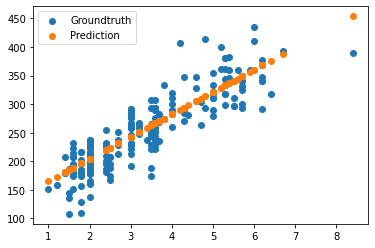

In [68]:
#trực quan giá trị thực tế và giá trị dự báo
plt.scatter(X_test.ENGINESIZE, y_test, label='Groundtruth')
plt.scatter(X_test.ENGINESIZE, prediction2, label='Prediction')
plt.legend()#legend có tác dụng phân biệt đc đâu và gtri thực tế, đâu là gtri dự báo, muốn dùng legend thì phải thêm label
plt.show()